<font color="blue" size ="6"><b>WELCOME TO PROJECT EXPO</b></font>

<font color="yellow" size="4"><b>7_Human_Horse </b></font>

In [1]:
#pip install split-folders[full]


In [2]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model


In [3]:
# split data in a new folder named data-split
#splitfolders.ratio("C:/Users/root/Desktop/DL/1_CNN/2_REPOSITORY_BASED/dataset/", output="C:/Users/root/Desktop/DL/1_CNN/2_REPOSITORY_BASED/dataset/data-split", seed=1337, ratio=(0.7, 0.2, 0.1), group_prefix=None, move=False)

In [4]:
datagen = ImageDataGenerator()

In [5]:
# define classes name
class_names = ['horse','human']

In [6]:
# training data
train_generator = datagen.flow_from_directory( 
    directory="C:/Users/Administrator/Desktop/dataset/data-split/train", 
    classes = class_names,
    target_size=(300, 300),  
    batch_size=32, 
    class_mode="binary", 
)

Found 897 images belonging to 2 classes.


In [7]:
# validation data
valid_generator = datagen.flow_from_directory( 
    directory="C:/Users/Administrator/Desktop/dataset/data-split/val/", 
    classes = class_names,
    target_size=(300, 300), 
    batch_size=32, 
    class_mode="binary", 
)

Found 256 images belonging to 2 classes.


In [8]:
# test data
test_generator = datagen.flow_from_directory( 
    directory="C:/Users/Administrator/Desktop/dataset/data-split/test/", 
    classes = class_names,
    target_size=(300, 300), 
    batch_size=32, 
    class_mode="binary", 
)

Found 130 images belonging to 2 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [10]:
model_history =model.fit(train_generator, validation_data=valid_generator, epochs=10, batch_size=32)

Epoch 1/10
29/29 [==============================] - 73s 2s/step - loss: 493.6062 - accuracy: 0.6867 - val_loss: 0.8294 - val_accuracy: 0.9219
Epoch 2/10
29/29 [==============================] - 68s 2s/step - loss: 0.6716 - accuracy: 0.8863 - val_loss: 0.3521 - val_accuracy: 0.9531
Epoch 3/10
29/29 [==============================] - 69s 2s/step - loss: 0.2447 - accuracy: 0.9454 - val_loss: 0.1208 - val_accuracy: 0.9609
Epoch 4/10
29/29 [==============================] - 70s 2s/step - loss: 0.1119 - accuracy: 0.9710 - val_loss: 0.1128 - val_accuracy: 0.9727
Epoch 5/10
29/29 [==============================] - 70s 2s/step - loss: 0.1006 - accuracy: 0.9755 - val_loss: 0.1293 - val_accuracy: 0.9570
Epoch 6/10
29/29 [==============================] - 70s 2s/step - loss: 0.0500 - accuracy: 0.9788 - val_loss: 0.1212 - val_accuracy: 0.9688
Epoch 7/10
29/29 [==============================] - 70s 2s/step - loss: 0.1704 - accuracy: 0.9844 - val_loss: 0.1182 - val_accuracy: 0.9727
Epoch 8/10
29/29 [

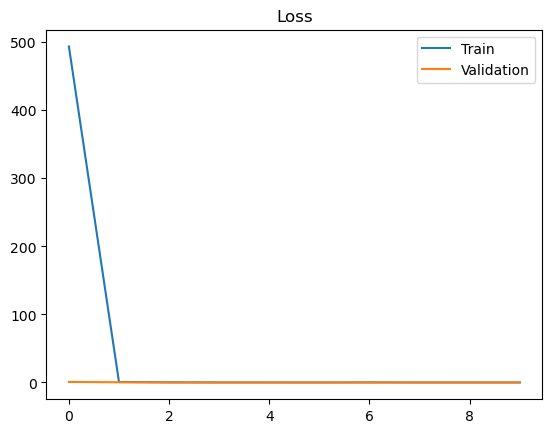

In [11]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

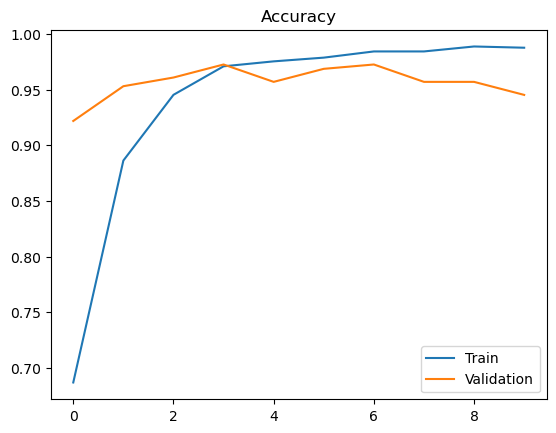

In [12]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [13]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

5/5 [==============================] - 3s 524ms/step - loss: 0.1638 - accuracy: 0.9615
The test loss is:  0.16375863552093506
The best accuracy is:  96.15384340286255


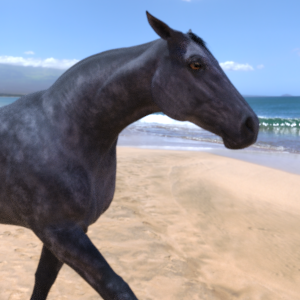

In [15]:
img = tf.keras.preprocessing.image.load_img('C:/Users/Administrator/Desktop/dataset/data-split/test/horse/horse36-6.png', target_size=(300, 300))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [16]:
# generate predictions for samples
prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    print("Human")
else:
    print("Horse")

1/1 [==============================] - 0s 140ms/step
Horse
